<a href="https://colab.research.google.com/github/BaruBangun/My_Learning/blob/main/K_NearestNeightbour_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd

df = pd.read_csv('car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [64]:
df = df.drop(['User ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [65]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
CT = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X = CT.fit_transform(X)

In [67]:
print(X)

[[0.0 1.0 35 20000]
 [0.0 1.0 40 43500]
 [0.0 1.0 49 74000]
 ...
 [1.0 0.0 28 138500]
 [1.0 0.0 48 134000]
 [1.0 0.0 44 73500]]


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=1)

In [69]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = np.array(SC.fit_transform(X_train))

In [70]:
print(X_train)

[[-1.01765584  1.01765584 -1.99868007 -0.09261347]
 [ 0.98265048 -0.98265048  1.20222065  0.87440623]
 [-1.01765584  1.01765584 -0.11579729 -0.36281015]
 ...
 [-1.01765584  1.01765584 -0.39822971 -0.53346069]
 [ 0.98265048 -0.98265048 -0.02165315  0.09225795]
 [ 0.98265048 -0.98265048 -0.11579729  1.17304467]]


In [71]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = model.predict(SC.transform(X_test))

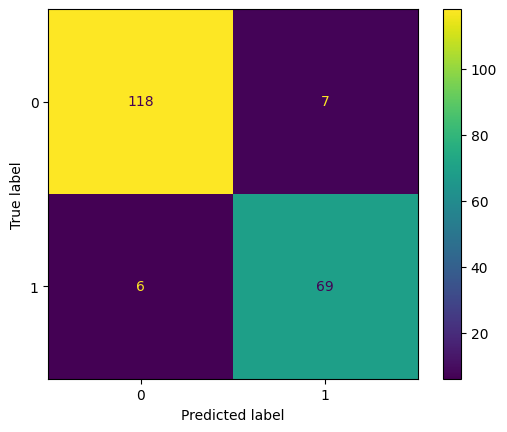

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(CM).plot()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       125
           1       0.91      0.92      0.91        75

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200



In [81]:
new_data = [['Male', 40, 100000]]
new_data = CT.transform(new_data)
print(new_data)

[[0.0 1.0 40 100000]]


In [82]:
new_data = SC.transform(new_data)
model.predict(new_data)

array([1])